In [1]:
import pandas as pd

In [2]:
# 사전투표일 : 2017년 5월 4일 ~ 2017년 5월 5일 오전 6시 ~ 오후 6시
# 투표일 : 2017년 5월 9일 오전 6시 ~ 오후 6시

## 대통령
raw_president_19 = pd.read_csv("./1st_preproc_data/대통령_19.csv", index_col=0)

In [3]:
# 사전투표일 : 2018년 6월 8일 ~ 2018년 6월 9일 오전 6시 ~ 오후 6시
# 투표일 : 2018년 6월 13일 오전 6시 ~ 오후 6시

## 시장 도지사 (big_mayor)
raw_big_mayor_7 = pd.read_csv("./1st_preproc_data/시장도지사_7.csv", index_col=0)
## 구청장 군청장 (small mayor)
raw_small_mayor_7 = pd.read_csv("./1st_preproc_data/구청군청장_7.csv", index_col=0)
## 시도의회의원 (Local Council Member / lcm)
raw_lcm_7 = pd.read_csv("./1st_preproc_data/시도의회의원_7.csv", index_col=0)

In [4]:
# 사전투표일 : 2020년 4월 10일 ~ 2020년 4월 11일 오전 6시 ~ 오후 6시
# 투표일 : 2020년 4월 15일 오전 6시 ~ 오후 6시

## 국회의원 (National Council Memeber / ncm)
raw_ncm_21 = pd.read_csv("./1st_preproc_data/국회의원_21.csv", index_col=0)

In [5]:
# 사전투표일 : 2022년 3월 4일 ~ 2022년 3월 5일 오전 6시 ~ 오후 6시
# 투표일 : 2022년 3월 9일 오전 6시 ~ 오후 6시

raw_president_20 = pd.read_csv("./1st_preproc_data/대통령_20.csv", index_col=0)

In [6]:
# 사전투표일 : 2022년 5월 27일(금)~2022년 5월 28일(토) 오전 6시~오후 6시
# 투표일 : 2022년 6월 1일(수) 오전 6시~오후 6시

## 시장 도지사 (big_mayor)
raw_big_mayor_8 = pd.read_csv("./1st_preproc_data/시장도지사_8.csv", index_col=0)
## 구청장 군청장 (small mayor)
raw_small_mayor_8 = pd.read_csv("./1st_preproc_data/구청군청장_8.csv", index_col=0)
## 시도의회의원 (Local Council Member / lcm)
raw_lcm_8 = pd.read_csv("./1st_preproc_data/시도의회의원_8.csv", index_col=0)

In [7]:
def get_total_sum_ratio(df):
    total_sum = df[["lib", "con"]].sum()
    total_sum_ratio = (total_sum / total_sum.sum()).to_frame().T
    total_sum_ratio.index = ["대한민국"]
    total_sum_ratio.index.name = "loc"
    total_sum_ratio = total_sum_ratio.loc[:, ["lib"]]
    total_sum_ratio
    return total_sum_ratio


def get_loc_1_sum_ratio(df):
    loc_1_sum = df.groupby("loc_1")[["lib", "con"]].sum()
    loc_1_sum_ratio = loc_1_sum.div(loc_1_sum.sum(axis=1), axis=0)
    loc_1_sum_ratio = loc_1_sum_ratio.loc[:, ["lib"]]
    return loc_1_sum_ratio


def get_loc_2_sum_ratio(df):
    loc_2_sum = df.groupby(["loc_1", "loc_2"])[["lib", "con"]].sum()
    loc_2_sum_ratio = loc_2_sum.div(loc_2_sum.sum(axis=1), axis=0)
    loc_2_sum_ratio = loc_2_sum_ratio.loc[:, ["lib"]]
    return loc_2_sum_ratio


def get_loc_3_sum_ratio(df):
    loc_3_sum = df.groupby(["loc_1", "loc_2", "loc_3"])[["lib", "con"]].sum()
    loc_3_sum_ratio = loc_3_sum.div(loc_3_sum.sum(axis=1), axis=0)
    loc_3_sum_ratio = loc_3_sum_ratio.loc[:, ["lib"]]
    return loc_3_sum_ratio

In [8]:
president_19 = raw_president_19.copy()

total_ratio_2017_05 = get_total_sum_ratio(president_19)
loc_1_ratio_2017_05 = get_loc_1_sum_ratio(president_19)
loc_2_ratio_2017_05 = get_loc_2_sum_ratio(president_19)

In [9]:
big_mayor_7 = raw_big_mayor_7.copy()

total_ratio_2018_06_a = get_total_sum_ratio(big_mayor_7)
loc_1_ratio_2018_06_a = get_loc_1_sum_ratio(big_mayor_7)
loc_2_ratio_2018_06_a = get_loc_2_sum_ratio(big_mayor_7)

small_mayor_7 = raw_small_mayor_7.copy()

total_ratio_2018_06_b = get_total_sum_ratio(small_mayor_7)
loc_1_ratio_2018_06_b = get_loc_1_sum_ratio(small_mayor_7)
loc_2_ratio_2018_06_b = get_loc_2_sum_ratio(small_mayor_7)

lcm_7 = raw_lcm_7.copy()

total_ratio_2018_06_c = get_total_sum_ratio(lcm_7)
loc_1_ratio_2018_06_c = get_loc_1_sum_ratio(lcm_7)
loc_2_ratio_2018_06_c = get_loc_2_sum_ratio(lcm_7)

In [10]:
total_ratio_2018_06 = pd.concat(
    [total_ratio_2018_06_a, total_ratio_2018_06_b, total_ratio_2018_06_c], axis=1
)
total_ratio_2018_06 = pd.DataFrame(
    total_ratio_2018_06.mean(axis=1), columns=total_ratio_2017_05.columns
)

#
loc_1_ratio_2018_06 = pd.concat(
    [loc_1_ratio_2018_06_a, loc_1_ratio_2018_06_b, loc_1_ratio_2018_06_c], axis=1
)
loc_1_ratio_2018_06 = pd.DataFrame(
    loc_1_ratio_2018_06.mean(axis=1), columns=loc_1_ratio_2017_05.columns
)

#
loc_2_ratio_2018_06 = pd.concat(
    [loc_2_ratio_2018_06_a, loc_2_ratio_2018_06_b, loc_2_ratio_2018_06_c], axis=1
)
loc_2_ratio_2018_06 = pd.DataFrame(
    loc_2_ratio_2018_06.mean(axis=1), columns=loc_2_ratio_2017_05.columns
)

In [11]:
ncm_21 = raw_ncm_21.copy()

total_ratio_2020_04 = get_total_sum_ratio(ncm_21)
loc_1_ratio_2020_04 = get_loc_1_sum_ratio(ncm_21)
loc_2_ratio_2020_04 = get_loc_2_sum_ratio(ncm_21)

In [12]:
president_20 = raw_president_20.copy()

total_ratio_2022_03 = get_total_sum_ratio(president_20)
loc_1_ratio_2022_03 = get_loc_1_sum_ratio(president_20)
loc_2_ratio_2022_03 = get_loc_2_sum_ratio(president_20)

In [13]:
big_mayor_8 = raw_big_mayor_8.copy()

total_ratio_2022_06_a = get_total_sum_ratio(big_mayor_8)
loc_1_ratio_2022_06_a = get_loc_1_sum_ratio(big_mayor_8)
loc_2_ratio_2022_06_a = get_loc_2_sum_ratio(big_mayor_8)

small_mayor_8 = raw_small_mayor_8.copy()

total_ratio_2022_06_b = get_total_sum_ratio(small_mayor_8)
loc_1_ratio_2022_06_b = get_loc_1_sum_ratio(small_mayor_8)
loc_2_ratio_2022_06_b = get_loc_2_sum_ratio(small_mayor_8)

lcm_8 = raw_lcm_8.copy()

total_ratio_2022_06_c = get_total_sum_ratio(lcm_8)
loc_1_ratio_2022_06_c = get_loc_1_sum_ratio(lcm_8)
loc_2_ratio_2022_06_c = get_loc_2_sum_ratio(lcm_8)

In [14]:
#
total_ratio_2022_06 = pd.concat(
    [total_ratio_2022_06_a, total_ratio_2022_06_b, total_ratio_2022_06_c], axis=1
)
total_ratio_2022_06 = pd.DataFrame(
    total_ratio_2022_06.mean(axis=1), columns=total_ratio_2017_05.columns
)

#
loc_1_ratio_2022_06 = pd.concat(
    [loc_1_ratio_2022_06_a, loc_1_ratio_2022_06_b, loc_1_ratio_2022_06_c], axis=1
)
loc_1_ratio_2022_06 = pd.DataFrame(
    loc_1_ratio_2022_06.mean(axis=1), columns=loc_1_ratio_2017_05.columns
)

#
loc_2_ratio_2022_06 = pd.concat(
    [loc_2_ratio_2022_06_a, loc_2_ratio_2022_06_b, loc_2_ratio_2022_06_c], axis=1
)
loc_2_ratio_2022_06 = pd.DataFrame(
    loc_2_ratio_2022_06.mean(axis=1), columns=loc_2_ratio_2017_05.columns
)

In [15]:
total_ratio = pd.concat(
    [
        total_ratio_2017_05,
        total_ratio_2018_06,
        total_ratio_2020_04,
        total_ratio_2022_03,
        total_ratio_2022_06,
    ],
    axis=1,
)
total_ratio.columns = ["2017_05", "2018_06", "2020_04", "2022_03", "2022_06"]
total_ratio

,2017_05,2018_06,2020_04,2022_03,2022_06
loc,,,,,
대한민국,0.614943,0.630849,0.536092,0.492031,0.449674


In [16]:
loc_1_ratio = pd.concat(
    [
        loc_1_ratio_2017_05,
        loc_1_ratio_2018_06,
        loc_1_ratio_2020_04,
        loc_1_ratio_2022_03,
        loc_1_ratio_2022_06,
    ],
    axis=1,
)
loc_1_ratio.columns = ["2017_05", "2018_06", "2020_04", "2022_03", "2022_06"]
loc_1_ratio

,2017_05,2018_06,2020_04,2022_03,2022_06
loc_1,,,,,
강원도,0.510431,0.570984,0.503226,0.429955,0.433912
경기도,0.657532,0.644777,0.559388,0.525693,0.487598
경상남도,0.479417,0.532987,0.403914,0.387304,0.337533
경상북도,0.284485,0.342526,0.281257,0.240142,0.209872
광주광역시,0.975333,1.000000,0.990258,0.874102,0.789358
대구광역시,0.305944,0.407156,0.312981,0.217279,0.353326
대전광역시,0.663701,0.658658,0.540659,0.478436,0.466288
부산광역시,0.529919,0.557860,0.442662,0.388716,0.351141
서울특별시,0.656771,0.673882,0.550216,0.468305,0.431501


In [17]:
loc_2_ratio = pd.concat(
    [
        loc_2_ratio_2017_05,
        loc_2_ratio_2018_06,
        loc_2_ratio_2020_04,
        loc_2_ratio_2022_03,
        loc_2_ratio_2022_06,
    ],
    axis=1,
)
loc_2_ratio.columns = ["2017_05", "2018_06", "2020_04", "2022_03", "2022_06"]
loc_2_ratio

2017_05   2018_06   2020_04   2022_03   2022_06
loc_1 loc_2                                                   
강원도   강릉시     0.460487  0.502870  0.774824  0.397252  0.389965
      고성군     0.427484  0.567431  0.420340  0.395600  0.481177
      동해시     0.450495  0.546682  0.425386  0.412445  0.357038
      삼척시     0.424616  0.568265  0.445088  0.381966  0.426420
      속초시     0.495998  0.553847  0.451723  0.428085  0.411546
...                ...       ...       ...       ...       ...
충청북도  청주시서원구  0.633617  0.664003  0.503997  0.472632  0.421710
      청주시청원구  0.663150  0.693567  0.532854  0.506950  0.455574
      청주시흥덕구  0.668347  0.682376  0.558148  0.494813  0.437002
      충주시     0.510614  0.561950  0.456211  0.452530  0.390951
인천광역시 미추홀구         NaN       NaN  0.612815  0.491866  0.443399

[251 rows x 5 columns]

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

colors = ["darkred", "red", "lightcoral", "grey", "lightskyblue", "blue", "darkblue"]

rgb = LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(colors))

In [19]:
pop_dict = president_20.groupby("loc_1")["투표수"].sum().to_dict()
loc_1_sorted_by_votes = (
    pd.Series(loc_1_ratio.index).map(pop_dict).sort_values(ascending=False).index
)
loc_1_ratio_sp = loc_1_ratio.iloc[loc_1_sorted_by_votes, :].copy()

In [20]:
df = pd.concat([total_ratio, loc_1_ratio_sp], axis=0)

<Axes: >

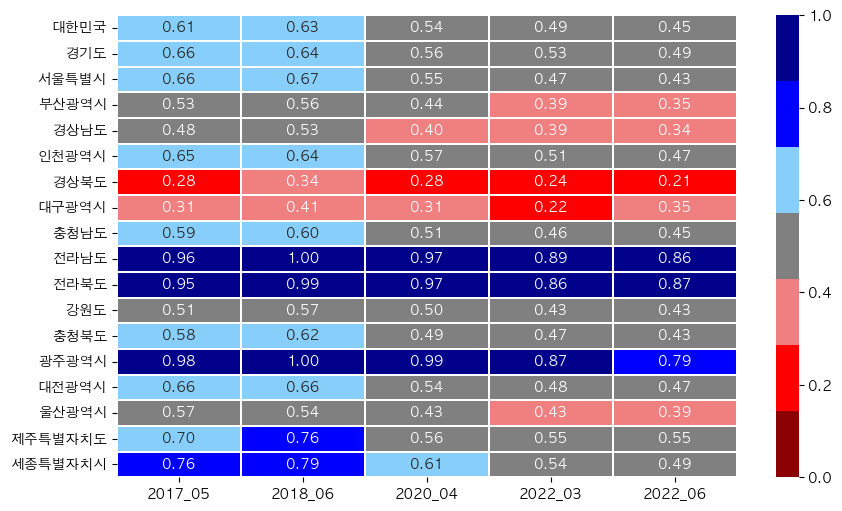

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    data=df,
    cmap=rgb,
    vmin=0,
    vmax=1,
    linewidths=0.1,
    annot=True,
    fmt=".2f",
)

<Axes: >

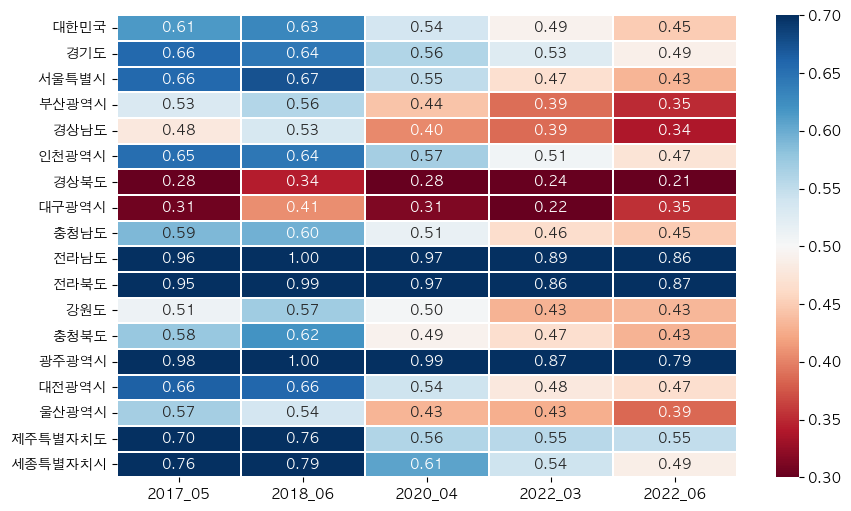

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    data=df,
    cmap="RdBu",
    vmin=0.3,
    vmax=0.7,
    linewidths=0.1,
    annot=True,
    fmt=".2f",
)